<a href="https://colab.research.google.com/github/devanshi-shah11/Real-Estate-Analysis-using-Python/blob/main/Real_Estate_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Libraries

In [ ]:
import pandas as pd
import datetime as datetime
import time

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# Loading Data from Redfin

In [ ]:
url = 'https://redfin-public-data.s3.us-west-2.amazonaws.com/redfin_market_tracker/zip_code_market_tracker.tsv000.gz'

start = time.time()
df = pd.read_csv(url, compression = 'gzip', sep = '\t')

# end time
execution = (time.time() - start)
print('Execution time in minutes: ' + str(round(execution / 60, 2)))
print('Num of rows: ', len(df))
print('Num of columns: ', len(df.columns))
df.head()

Execution time in minutes: 12.39
Num of rows:  6911939
Num of columns:  58


,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2022-06-01,2022-08-31,90,zip code,2,30725,f,Zip Code: 71923,NaN,Arkansas,AR,All Residential,-1,167500.0,0.062817,0.131757,164000.0,0.038632,-0.078652,103.847690,0.032063,0.134446,106.388206,-0.001369,0.108991,50.0,-0.019608,0.282051,12.0,-0.20,0.0,53.0,0.000000,0.962963,32.0,0.000000,0.600000,NaN,NaN,NaN,43.5,-11.5,-16.5,0.959252,-0.016250,-0.013576,0.14,-0.016863,-0.090769,NaN,NaN,NaN,0.25,-0.016667,0.083333,"Arkadelphia, AR",11660,2023-04-09 14:55:08
1,2019-12-01,2020-02-29,90,zip code,2,21126,f,Zip Code: 49265,NaN,Michigan,MI,All Residential,-1,294000.0,0.289474,0.781818,196950.0,-0.296356,0.094471,153.793302,0.241780,0.430980,115.717607,-0.201889,-0.150170,20.0,0.000000,0.176471,5.0,0.25,1.5,16.0,-0.058824,0.000000,18.0,-0.333333,-0.470588,NaN,NaN,NaN,77.0,10.0,-33.0,0.953579,-0.015355,-0.024645,0.05,0.000000,-0.185294,NaN,NaN,NaN,0.20,0.200000,-0.300000,"Adrian, MI",10300,2023-04-09 14:55:08
2,2012-07-01,2012-09-30,90,zip code,2,34119,f,Zip Code: 78727,NaN,Texas,TX,Townhouse,13,140000.0,NaN,-0.255319,NaN,NaN,NaN,106.707317,NaN,-0.266671,NaN,NaN,NaN,1.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,NaN,35.0,0.965517,NaN,0.006334,0.00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,"Austin, TX",12420,2023-04-09 14:55:08
3,2012-11-01,2013-01-31,90,zip code,2,13119,f,Zip Code: 31503,NaN,Georgia,GA,Single Family Residential,6,60000.0,0.395349,NaN,26900.0,0.000000,NaN,30.816641,0.088729,NaN,17.208687,0.000000,NaN,1.0,-0.500000,NaN,NaN,NaN,NaN,2.0,0.000000,NaN,3.0,0.000000,NaN,NaN,NaN,NaN,184.0,19.5,NaN,0.681818,-0.092424,NaN,0.00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Waycross, GA",48180,2023-04-09 14:55:08
4,2016-04-01,2016-06-30,90,zip code,2,34063,f,Zip Code: 78648,NaN,Texas,TX,Multi-Family (2-4 Unit),4,229500.0,NaN,NaN,NaN,NaN,NaN,83.881579,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158.0,NaN,NaN,1.020000,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Austin, TX",12420,2023-04-09 14:55:08


# Data Cleaning and Transformation

In [ ]:
# filter on state code
state_code = 'MD'
df_filter = df[df['state_code'] == state_code]
print(f"Num of rows: {len(df_filter)}")
df_filter.head(1)


Num of rows: 146070


,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
49,2013-01-01,2013-03-31,90,zip code,2,8655,f,Zip Code: 21783,NaN,Maryland,MD,Single Family Residential,6,165000.0,-0.011976,0.435407,205950.0,-0.010807,-0.113812,93.283582,-0.36228,0.06337,109.750252,-0.03254,-0.100569,11.0,0.222222,-0.214286,1.0,-0.5,-0.75,22.0,0.571429,0.1,33.0,0.375,0.03125,NaN,NaN,NaN,67.0,37.0,-50.0,0.969329,-0.011801,0.015495,0.181818,-0.151515,-0.032468,NaN,NaN,NaN,0.0,0.0,-0.25,"Hagerstown, MD",25180,2023-04-09 14:55:08


In [ ]:
# get zip code county data
geo_data_url = 'https://raw.githubusercontent.com/scpike/us-state-county-zip/master/geo-data.csv'
df_geo = pd.read_csv(geo_data_url)
print('Num of rows:', len(df_geo))
print('Num of columns:', len(df_geo.columns))
df_geo.head()


Num of rows: 33103
Num of columns: 6


,state_fips,state,state_abbr,zipcode,county,city
0,1,Alabama,AL,35004,St. Clair,Acmar
1,1,Alabama,AL,35005,Jefferson,Adamsville
2,1,Alabama,AL,35006,Jefferson,Adger
3,1,Alabama,AL,35007,Shelby,Keystone
4,1,Alabama,AL,35010,Tallapoosa,New site


In [ ]:
df_county = df_geo.loc[(df_geo['state_abbr'] == 'MD') & (df_geo['county'].notnull()), ['county']].drop_duplicates()

In [ ]:
# List of counties in Maryland
df_county

,county
12228,Charles
12231,St. Marys
12232,Prince Georges
12238,Calvert
12286,Howard
12292,Anne Arundel
12338,Montgomery
12374,Frederick
12384,Harford
12389,Baltimore


In [ ]:
# filter on single county
df_geo_county = df_geo.loc[(df_geo['state_abbr'].isin(['MD'])) & (df_geo['county'].isin(['Prince Georges','Howard','Montgomery']))]

# create feature to check if zip code is valid
df_geo_county['valid_zip_code'] = df_geo_county.apply(lambda x: x['zipcode'].isnumeric(), axis=1)

print('Dataset:')
print(df_geo_county.groupby(['valid_zip_code', 'county'])['zipcode'].count())
print(' ')
print('Invalid zip codes:', df_geo_county.loc[df_geo_county['valid_zip_code'] == False]['zipcode'].unique())

Dataset:
valid_zip_code  county        
False           Montgomery         1
True            Howard            18
                Montgomery        44
                Prince Georges    34
Name: zipcode, dtype: int64
 
Invalid zip codes: ['209HH']


In [ ]:
# filter on only valid zip codes
df_geo_county_valid = df_geo_county.loc[df_geo_county['valid_zip_code'] == True]
print('Num of VALID zip codes:', len(df_geo_county_valid))
df_geo_county_valid.head()

Num of VALID zip codes: 96


,state_fips,state,state_abbr,zipcode,county,city,valid_zip_code
12232,24,Maryland,MD,20607,Prince Georges,Accokeek,True
12233,24,Maryland,MD,20608,Prince Georges,Aquasco,True
12237,24,Maryland,MD,20613,Prince Georges,Brandywine,True
12246,24,Maryland,MD,20623,Prince Georges,Cheltenham,True
12286,24,Maryland,MD,20701,Howard,Annapolis juncti,True


In [ ]:
# get zip code from region field
df_filter['zipcode'] = df_filter.apply(lambda x: x['region'].split(':')[1].strip(), axis=1)
# merge market data and geo zip codes
df_merge = pd.merge(
    df_filter,
    df_geo_county_valid[['zipcode', 'city', 'county']],
    how='inner', # only return zip codes from BOTH tables
    on=['zipcode'] # field to join on
)
print('Num of rows:', len(df_merge))
df_merge.head()

Num of rows: 41838


,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city_x,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,zipcode,city_y,county
0,2012-09-01,2012-11-30,90,zip code,2,8282,f,Zip Code: 20854,NaN,Maryland,MD,Condo/Co-op,3,567500.0,-0.206183,-0.120155,737950.0,-0.179143,-0.006663,450.340074,-0.071174,0.014487,502.496750,-0.026867,0.005053,8.0,0.142857,0.600000,NaN,NaN,NaN,4.0,0.333333,-0.555556,5.0,1.500000,-0.285714,NaN,NaN,NaN,37.0,17.0,-183.0,0.964199,-0.008628,0.005979,0.125000,-0.017857,0.125000,NaN,NaN,NaN,NaN,NaN,NaN,"Frederick, MD",23224,2023-04-09 14:55:08,20854,Potomac,Montgomery
1,2014-05-01,2014-07-31,90,zip code,2,8282,f,Zip Code: 20854,NaN,Maryland,MD,Condo/Co-op,3,950000.0,0.811249,0.091954,930000.0,-0.266272,0.347826,513.878030,0.035177,-0.005342,527.756059,0.000000,0.122055,4.0,1.000000,0.000000,NaN,NaN,NaN,5.0,0.250000,4.000000,3.0,0.500000,0.000000,NaN,NaN,NaN,30.5,-32.5,16.5,0.979205,0.020795,0.009022,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,"Frederick, MD",23224,2023-04-09 14:55:08,20854,Potomac,Montgomery
2,2018-05-01,2018-07-31,90,zip code,2,8282,f,Zip Code: 20854,NaN,Maryland,MD,Townhouse,13,639950.0,-0.092270,-0.085786,639900.0,0.015714,0.001408,302.066110,0.037634,-0.006729,332.200097,0.044553,0.084678,36.0,-0.142857,0.333333,6.0,-0.142857,0.000000,33.0,0.000000,-0.266667,20.0,0.052632,-0.428571,NaN,NaN,NaN,30.0,3.0,14.5,0.979519,0.000739,-0.008208,0.111111,-0.031746,-0.074074,NaN,NaN,NaN,0.333333,-0.238095,0.166667,"Frederick, MD",23224,2023-04-09 14:55:08,20854,Potomac,Montgomery
3,2020-04-01,2020-06-30,90,zip code,2,8282,f,Zip Code: 20854,NaN,Maryland,MD,Townhouse,13,604500.0,-0.027666,-0.030473,624900.0,0.024426,-0.038615,307.127524,0.058759,0.013209,299.553856,-0.056636,0.044398,24.0,0.333333,-0.076923,11.0,-0.083333,0.375000,27.0,0.080000,-0.228571,11.0,-0.214286,-0.500000,NaN,NaN,NaN,39.0,-4.5,10.5,0.990461,0.003452,-0.004168,0.250000,0.138889,0.096154,NaN,NaN,NaN,0.545455,0.212121,-0.079545,"Frederick, MD",23224,2023-04-09 14:55:08,20854,Potomac,Montgomery
4,2018-05-01,2018-07-31,90,zip code,2,8282,f,Zip Code: 20854,NaN,Maryland,MD,Single Family Residential,6,965000.0,-0.003408,-0.017312,1000000.0,-0.047165,-0.023438,288.888889,0.047912,0.083614,286.096649,-0.006101,0.047100,200.0,0.030928,0.176471,43.0,-0.218182,0.162162,208.0,-0.235294,-0.041475,181.0,-0.062176,-0.191964,NaN,NaN,NaN,23.0,4.0,3.0,0.984583,-0.000667,0.003996,0.280000,-0.013814,0.050588,NaN,NaN,NaN,0.348837,-0.087526,-0.002514,"Frederick, MD",23224,2023-04-09 14:55:08,20854,Potomac,Montgomery


Below is the comprehensive list of the features in our dataset:

median_sale_price: The final home sale price covering all homes with a sale date during a given time period where 50% of the sales were above this price and 50% were below this price.

median_list_price: The most recent listing price covering all homes with a listing date during a given time period where 50% of the active listings were above this price and 50% were below this price.

median_ppsf: The median list price per square foot of all active listings.

homes_sold: Total number of homes with a sale date during a given time period.

pending_sales: Total homes that went under contract during the period. Excludes homes that were on the market longer than 90 days.

new_listings: Total number of homes with a listing added date during a given time period.

inventory: Total number of active listings on the last day a given time period.

months_of_supply: When data are monthly, it is inventory divided by home sales. This tells you how long it would take supply to be bought up if no new homes came on the market.

median_dom: The number of days between the date the home was listed for sale and when the home went off-market/pending sale covering all homes with an off-market date during a given time period where 50% of the off-market homes sat longer on the market and 50% went off the market faster. Excludes homes that sat on the market for more than 1 year.

avg_sale_to_list: The mean ratio of each homes sale price divided by their list price covering all homes with a sale date during a given time period. Excludes properties with a sale price 50%

sold_above_list: The percent of homes sales with a sale price greater than their latest list price covering all homes with a sale date during a given time period. Excludes properties with a sale price 50% above the listing price or with a sale price 50% below the list price.

price_drops: How many listings dropped their price in a given time period.

off_market_in_two_weeks: The total number of homes that went under contract within two weeks of their listing date.

In [ ]:
# pip install altair


In [ ]:
# add features
df_features = df_merge.copy()
print('Max begin date:', df_features['period_begin'].max())
print('Max end date:', df_features['period_end'].max())
max_end_date = df_features['period_end'].max()

# 1) flag for most recent date
df_features['latest_period'] = df_features.apply(
    lambda x: True if x['period_end'] == max_end_date else False, axis=1)

# 2) remove Redfin city and keep Geo city
df_features = df_features.drop(columns=['city_x'])
df_features = df_features.rename(columns={'city_y': 'city'})

# 3) fix median days on market (bad data)
df_features['median_dom_mom'] = df_features.sort_values(by=['period_begin'])['median_dom'].pct_change()

# view first 5 rows
df_features.head()

Max begin date: 2023-01-01
Max end date: 2023-03-31


,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,zipcode,city,county,latest_period
0,2012-09-01,2012-11-30,90,zip code,2,8282,f,Zip Code: 20854,Maryland,MD,Condo/Co-op,3,567500.0,-0.206183,-0.120155,737950.0,-0.179143,-0.006663,450.340074,-0.071174,0.014487,502.496750,-0.026867,0.005053,8.0,0.142857,0.600000,NaN,NaN,NaN,4.0,0.333333,-0.555556,5.0,1.500000,-0.285714,NaN,NaN,NaN,37.0,0.275862,-183.0,0.964199,-0.008628,0.005979,0.125000,-0.017857,0.125000,NaN,NaN,NaN,NaN,NaN,NaN,"Frederick, MD",23224,2023-04-09 14:55:08,20854,Potomac,Montgomery,False
1,2014-05-01,2014-07-31,90,zip code,2,8282,f,Zip Code: 20854,Maryland,MD,Condo/Co-op,3,950000.0,0.811249,0.091954,930000.0,-0.266272,0.347826,513.878030,0.035177,-0.005342,527.756059,0.000000,0.122055,4.0,1.000000,0.000000,NaN,NaN,NaN,5.0,0.250000,4.000000,3.0,0.500000,0.000000,NaN,NaN,NaN,30.5,0.220000,16.5,0.979205,0.020795,0.009022,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,"Frederick, MD",23224,2023-04-09 14:55:08,20854,Potomac,Montgomery,False
2,2018-05-01,2018-07-31,90,zip code,2,8282,f,Zip Code: 20854,Maryland,MD,Townhouse,13,639950.0,-0.092270,-0.085786,639900.0,0.015714,0.001408,302.066110,0.037634,-0.006729,332.200097,0.044553,0.084678,36.0,-0.142857,0.333333,6.0,-0.142857,0.000000,33.0,0.000000,-0.266667,20.0,0.052632,-0.428571,NaN,NaN,NaN,30.0,0.875000,14.5,0.979519,0.000739,-0.008208,0.111111,-0.031746,-0.074074,NaN,NaN,NaN,0.333333,-0.238095,0.166667,"Frederick, MD",23224,2023-04-09 14:55:08,20854,Potomac,Montgomery,False
3,2020-04-01,2020-06-30,90,zip code,2,8282,f,Zip Code: 20854,Maryland,MD,Townhouse,13,604500.0,-0.027666,-0.030473,624900.0,0.024426,-0.038615,307.127524,0.058759,0.013209,299.553856,-0.056636,0.044398,24.0,0.333333,-0.076923,11.0,-0.083333,0.375000,27.0,0.080000,-0.228571,11.0,-0.214286,-0.500000,NaN,NaN,NaN,39.0,0.625000,10.5,0.990461,0.003452,-0.004168,0.250000,0.138889,0.096154,NaN,NaN,NaN,0.545455,0.212121,-0.079545,"Frederick, MD",23224,2023-04-09 14:55:08,20854,Potomac,Montgomery,False
4,2018-05-01,2018-07-31,90,zip code,2,8282,f,Zip Code: 20854,Maryland,MD,Single Family Residential,6,965000.0,-0.003408,-0.017312,1000000.0,-0.047165,-0.023438,288.888889,0.047912,0.083614,286.096649,-0.006101,0.047100,200.0,0.030928,0.176471,43.0,-0.218182,0.162162,208.0,-0.235294,-0.041475,181.0,-0.062176,-0.191964,NaN,NaN,NaN,23.0,1.090909,3.0,0.984583,-0.000667,0.003996,0.280000,-0.013814,0.050588,NaN,NaN,NaN,0.348837,-0.087526,-0.002514,"Frederick, MD",23224,2023-04-09 14:55:08,20854,Potomac,Montgomery,False


In [ ]:
import pandas as pd

sorted_unique_zipcodes = df_features['zipcode'].unique()
sorted_unique_zipcodes.sort()

df_zipcodes = pd.DataFrame(sorted_unique_zipcodes, columns=['zipcode'])
display(df_zipcodes)


,zipcode
0,20607
1,20608
2,20613
3,20623
4,20705
...,...
89,21723
90,21737
91,21738
92,21794


In [ ]:
!pip install geopy

     |████████████████████████████████| 119 kB 7.0 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 12.1 MB/s eta 0:00:01


In [ ]:
# create a geolocator object
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my_app", timeout= None)


# define a function to get the latitudes and longitudes
def get_lat_lon(zipcode):
    location = geolocator.geocode(f"{zipcode}")
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# apply the function to your dataset
df_zipcodes["latitude"], df_zipcodes["longitude"] = zip(*df_zipcodes.apply(lambda row: get_lat_lon(row["zipcode"]), axis=1))


In [ ]:
# merge df_zipcodes with df_features on 'zipcode' column
df_features = df_features.merge(df_zipcodes[['zipcode', 'latitude', 'longitude']], on='zipcode', how='left')


In [ ]:
df_features.head()

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,zipcode,city,county,latest_period,latitude,longitude
0,2012-09-01,2012-11-30,90,zip code,2,8282,f,Zip Code: 20854,Maryland,MD,Condo/Co-op,3,567500.0,-0.206183,-0.120155,737950.0,-0.179143,-0.006663,450.340074,-0.071174,0.014487,502.496750,-0.026867,0.005053,8.0,0.142857,0.600000,NaN,NaN,NaN,4.0,0.333333,-0.555556,5.0,1.500000,-0.285714,NaN,NaN,NaN,37.0,0.275862,-183.0,0.964199,-0.008628,0.005979,0.125000,-0.017857,0.125000,NaN,NaN,NaN,NaN,NaN,NaN,"Frederick, MD",23224,2023-04-09 14:55:08,20854,Potomac,Montgomery,False,45.610327,9.273792
1,2014-05-01,2014-07-31,90,zip code,2,8282,f,Zip Code: 20854,Maryland,MD,Condo/Co-op,3,950000.0,0.811249,0.091954,930000.0,-0.266272,0.347826,513.878030,0.035177,-0.005342,527.756059,0.000000,0.122055,4.0,1.000000,0.000000,NaN,NaN,NaN,5.0,0.250000,4.000000,3.0,0.500000,0.000000,NaN,NaN,NaN,30.5,0.220000,16.5,0.979205,0.020795,0.009022,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,"Frederick, MD",23224,2023-04-09 14:55:08,20854,Potomac,Montgomery,False,45.610327,9.273792
2,2018-05-01,2018-07-31,90,zip code,2,8282,f,Zip Code: 20854,Maryland,MD,Townhouse,13,639950.0,-0.092270,-0.085786,639900.0,0.015714,0.001408,302.066110,0.037634,-0.006729,332.200097,0.044553,0.084678,36.0,-0.142857,0.333333,6.0,-0.142857,0.000000,33.0,0.000000,-0.266667,20.0,0.052632,-0.428571,NaN,NaN,NaN,30.0,0.875000,14.5,0.979519,0.000739,-0.008208,0.111111,-0.031746,-0.074074,NaN,NaN,NaN,0.333333,-0.238095,0.166667,"Frederick, MD",23224,2023-04-09 14:55:08,20854,Potomac,Montgomery,False,45.610327,9.273792
3,2020-04-01,2020-06-30,90,zip code,2,8282,f,Zip Code: 20854,Maryland,MD,Townhouse,13,604500.0,-0.027666,-0.030473,624900.0,0.024426,-0.038615,307.127524,0.058759,0.013209,299.553856,-0.056636,0.044398,24.0,0.333333,-0.076923,11.0,-0.083333,0.375000,27.0,0.080000,-0.228571,11.0,-0.214286,-0.500000,NaN,NaN,NaN,39.0,0.625000,10.5,0.990461,0.003452,-0.004168,0.250000,0.138889,0.096154,NaN,NaN,NaN,0.545455,0.212121,-0.079545,"Frederick, MD",23224,2023-04-09 14:55:08,20854,Potomac,Montgomery,False,45.610327,9.273792
4,2018-05-01,2018-07-31,90,zip code,2,8282,f,Zip Code: 20854,Maryland,MD,Single Family Residential,6,965000.0,-0.003408,-0.017312,1000000.0,-0.047165,-0.023438,288.888889,0.047912,0.083614,286.096649,-0.006101,0.047100,200.0,0.030928,0.176471,43.0,-0.218182,0.162162,208.0,-0.235294,-0.041475,181.0,-0.062176,-0.191964,NaN,NaN,NaN,23.0,1.090909,3.0,0.984583,-0.000667,0.003996,0.280000,-0.013814,0.050588,NaN,NaN,NaN,0.348837,-0.087526,-0.002514,"Frederick, MD",23224,2023-04-09 14:55:08,20854,Potomac,Montgomery,False,45.610327,9.273792


In [ ]:
# Getting the list of zipcodes along with their corresponding cities for specific counties
def get_zipcodes(state, county):
    # Filter the data frame to only include the specified state and county
    filtered_df = df_features[(df_features['state'] == state) & (df_features['county'] == county)]

    # Create a list of unique cities in the filtered data frame
    cities = filtered_df['city'].unique().tolist()

    # Create a dictionary to store the zip codes for each city
    city_zipcodes = {}

    # Loop through the unique cities and extract their zip codes
    for city in cities:
        zipcodes = filtered_df[filtered_df['city'] == city]['zipcode'].unique().tolist()
        city_zipcodes[city] = zipcodes

    return city_zipcodes


In [ ]:

zipcodes = get_zipcodes('Maryland', 'Montgomery')
df_listofzip = pd.DataFrame(zipcodes.items(), columns=['City', 'Zipcodes'])
df_listofzip = df_listofzip.explode('Zipcodes').reset_index(drop=True)

df_listofzip

,City,Zipcodes
0,Potomac,20854
1,West bethesda,20817
2,Colesville,20905
3,Colesville,20904
4,Brinklow,20862
5,Laytonsville,20879
6,Laytonsville,20882
7,Takoma park,20912
8,Gaithersburg,20877
9,Gaithersburg,20886


# Exploratory Data Analysis

#  1) Total Inventory by month

In [ ]:
#inventory: Total number of active listings on the last day of a given time period.

import altair as alt
# Convert date column to datetime
df_features['period_end'] = pd.to_datetime(df_features['period_end'])

# Aggregate inventory by month and property type
data_agg = df_features.groupby([pd.Grouper(key='period_end', freq='M'), 'property_type']).agg({'inventory': 'sum'}).reset_index()


# Plot chart
alt.Chart(data_agg).mark_line().encode(
    x=alt.X('period_end:T', axis=alt.Axis(title='Month of Period End')),
    y=alt.Y('inventory:Q', axis=alt.Axis(title='Inventory')),
    color='property_type:N',
    tooltip=['property_type:N','period_end:T', 'inventory:Q', ]
).properties(
    title='Total Inventory by Month'
)



alt.Chart(...)

Analysis -  The visualization displays the total number of homes sold each month from 2013 to 2023. It reveals a positive linear trend in the data, indicating that the property values have been consistently increasing over time. Furthermore, the data shows that there is a seasonal pattern, with the number of homes sold gradually increasing over time and peaking during the summer months. The most popular type of property sold was single-family residential homes, followed by townhouses. Multi-family properties, on the other hand, were the least popular.

# Total Inventory by Month - dropdown menu

In [ ]:
import pandas as pd
import altair as alt

# Convert date column to datetime
df_features['period_end'] = pd.to_datetime(df_features['period_end'])

# Aggregate inventory by month, property type, and location
data_agg = df_features.groupby([pd.Grouper(key='period_end', freq='M'), 'property_type', 'county', 'city', 'zipcode']).agg({'inventory': 'sum'}).reset_index()

# Define filter dropdowns
city_dropdown = alt.binding_select(options=list(data_agg['city'].unique()))
city_select = alt.selection_single(fields=['city'], bind=city_dropdown)

county_dropdown = alt.binding_select(options=list(data_agg['county'].unique()))
county_select = alt.selection_single(fields=['county'], bind=county_dropdown)

zipcode_dropdown = alt.binding_select(options=list(data_agg['zipcode'].unique()))
zipcode_select = alt.selection_single(fields=['zipcode'], bind=zipcode_dropdown)

# Define chart
line_chart = alt.Chart(data_agg.sample(n=5000)).mark_line().encode(
    x='period_end',
    y='inventory',
    color='property_type',
    tooltip=['period_end', 'inventory']
).add_selection(
    city_select,
    county_select,
    zipcode_select
).transform_filter(
    city_select
).transform_filter(
    county_select
).transform_filter(
    zipcode_select
).properties(
    width=800,
    height=400,
    title='Inventory by Property Type'
).facet(column='property_type:N')

# Display chart
line_chart

alt.FacetChart(...)

# 2) Total Homes Sold

In [ ]:
# Aggregate homes sold by month
data_agg = df_features.groupby([pd.Grouper(key='period_end', freq='M'), 'property_type']).agg({'homes_sold': 'sum'}).reset_index()

# Plot chart
alt.Chart(data_agg).mark_line().encode(
    x=alt.X('period_end:T', axis=alt.Axis(title='Month of Period End')),
    y=alt.Y('homes_sold:Q', axis=alt.Axis(title='Homes Sold')),
    color='property_type:N',
    tooltip=['property_type:N', 'period_end:T', 'homes_sold:Q']
).properties(
    title='Total Homes Sold'
)


alt.Chart(...)

Analysis - Here, the homes sold refers to the total number of homes with a sale date during a given time period. One of the most significant findings was the presence of a positive linear trend in the data, indicating a general increase in property values over time. Additionally, seasonality was observed in the data, with the number of homes sold gradually increasing over time and peaking around July to September, followed by a decline in the number of homes sold. The data also showed that single family residential homes were the most popular type of property, followed by townhouses, while multi-family properties were the least popular.

# 3) Median Days on Market

In [ ]:
# Aggregate median DOM by month and property type
data_agg = df_features.groupby([pd.Grouper(key='period_end', freq='M'), 'property_type'])['median_dom'].median().reset_index(name='avg_median_dom')

# Plot chart with tooltip
alt.Chart(data_agg).mark_line().encode(
    x=alt.X('period_end:T', axis=alt.Axis(title='Month of Period End')),
    y=alt.Y('avg_median_dom:Q', axis=alt.Axis(title='Avg Median Dom')),
    color=alt.Color('property_type:N'),
    tooltip=['property_type:N', 'period_end:T', 'avg_median_dom:Q']
).properties(
    title='Median Days on Market',
).facet(column='property_type:N')


alt.FacetChart(...)

Analysis - The median days on market represents the amount of time a property stays on the market before being sold. The median days on market for all property types on average was approximately 60 days. However, the median days on market for single-family residential homes, townhouses, and condos were all around 40 days, while multi-family properties had a median of around 80 days, making them the least popular property type for customers.

# 4) Sold Above List Price by Month

In [ ]:
# Calculate average sold above list price by month and property type
data_agg = df_features.groupby([pd.Grouper(key='period_end', freq='M'), 'property_type']).agg({'sold_above_list': 'mean'}).reset_index()

alt.Chart(data_agg).mark_line().encode(
    x=alt.X('period_end:T', axis=alt.Axis(title='Month of Period End')),
    y=alt.Y('sold_above_list:Q', axis=alt.Axis(title='Avg Sold Above List')),
    color='property_type:N',
    tooltip=['property_type:N', 'period_end:T', 'sold_above_list:Q']
).properties(
    title='Sold Above List Price by Month'
).facet(column='property_type:N')


alt.FacetChart(...)

Analysis- Initially around 2013, there was a modest 24% increase in property prices.

However, there has been a significant increase in real estate prices in recent years (2022-2023)

60% of properties were sold above the listed price during 2022-23


# 5) Median List Price By Month

In [ ]:
# Calculate average median list price by month and property type
data_agg = df_features.groupby([pd.Grouper(key='period_end', freq='M'), 'property_type']).agg({'median_list_price': 'mean'}).reset_index()

# Plot chart with tooltip and faceting by property type
alt.Chart(data_agg).mark_line().encode(
    x=alt.X('period_end:T', axis=alt.Axis(title='Month of Period End')),
    y=alt.Y('median_list_price:Q', axis=alt.Axis(title='Avg Median List Price')),
    color='property_type:N',
    tooltip=['property_type:N', 'period_end:T', 'median_list_price:Q']
).properties(
    title='Median List Price by Month'
).facet(column='property_type:N')


alt.FacetChart(...)

Analysis - Median list price for all the properties has been constant around 600k for the past 10 years.Condos have the lowest list price for around 250k. With single family homes having the list price around 750 k.

# 6) Median Sale Price by Month for different counties after Dec 2019

In [ ]:
# Create boolean mask for dates on or after Jan 2022
mask = df_features['period_end'] >= '2019-12-31'

# Filter data using boolean mask
df_filtered = df_features[mask]

# Aggregate median list price by month, property type, and county
data_agg = df_filtered.groupby([pd.Grouper(key='period_end', freq='M'), 'property_type', 'county']).agg({'median_sale_price': 'mean'}).reset_index()

alt.Chart(data_agg).mark_bar().encode(
    x=alt.X('period_end:T', axis=alt.Axis(title='Month of Period End')),
    y=alt.Y('median_sale_price:Q', axis=alt.Axis(title='Median Sale Price')),
    color='county:N',
    tooltip=['property_type:N', 'county:N', 'period_end:T', 'median_sale_price:Q']
).properties(
    title='Median Sale Price by Month'
).facet( 'county:N')


alt.FacetChart(...)

Analysis- Property prices vary across counties

Montgomery and Howard have higher prices than PG county

Better schools, hospitals, and lower crime rates could be factors

Additional data and analysis needed to confirm these factors.


# Sale to list price ratio heatmap

In [ ]:
df_features['sale_to_list_ratio'] = df_features['median_sale_price'] / df_features['median_list_price']
df_features.head()


,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,zipcode,city,county,latest_period,latitude,longitude,sale_to_list_ratio
0,2012-09-01,2012-11-30,90,zip code,2,8282,f,Zip Code: 20854,Maryland,MD,Condo/Co-op,3,567500.0,-0.206183,-0.120155,737950.0,-0.179143,-0.006663,450.340074,-0.071174,0.014487,502.496750,-0.026867,0.005053,8.0,0.142857,0.600000,NaN,NaN,NaN,4.0,0.333333,-0.555556,5.0,1.500000,-0.285714,NaN,NaN,NaN,37.0,0.275862,-183.0,0.964199,-0.008628,0.005979,0.125000,-0.017857,0.125000,NaN,NaN,NaN,NaN,NaN,NaN,"Frederick, MD",23224,2023-04-09 14:55:08,20854,Potomac,Montgomery,False,45.610327,9.273792,0.769022
1,2014-05-01,2014-07-31,90,zip code,2,8282,f,Zip Code: 20854,Maryland,MD,Condo/Co-op,3,950000.0,0.811249,0.091954,930000.0,-0.266272,0.347826,513.878030,0.035177,-0.005342,527.756059,0.000000,0.122055,4.0,1.000000,0.000000,NaN,NaN,NaN,5.0,0.250000,4.000000,3.0,0.500000,0.000000,NaN,NaN,NaN,30.5,0.220000,16.5,0.979205,0.020795,0.009022,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,"Frederick, MD",23224,2023-04-09 14:55:08,20854,Potomac,Montgomery,False,45.610327,9.273792,1.021505
2,2018-05-01,2018-07-31,90,zip code,2,8282,f,Zip Code: 20854,Maryland,MD,Townhouse,13,639950.0,-0.092270,-0.085786,639900.0,0.015714,0.001408,302.066110,0.037634,-0.006729,332.200097,0.044553,0.084678,36.0,-0.142857,0.333333,6.0,-0.142857,0.000000,33.0,0.000000,-0.266667,20.0,0.052632,-0.428571,NaN,NaN,NaN,30.0,0.875000,14.5,0.979519,0.000739,-0.008208,0.111111,-0.031746,-0.074074,NaN,NaN,NaN,0.333333,-0.238095,0.166667,"Frederick, MD",23224,2023-04-09 14:55:08,20854,Potomac,Montgomery,False,45.610327,9.273792,1.000078
3,2020-04-01,2020-06-30,90,zip code,2,8282,f,Zip Code: 20854,Maryland,MD,Townhouse,13,604500.0,-0.027666,-0.030473,624900.0,0.024426,-0.038615,307.127524,0.058759,0.013209,299.553856,-0.056636,0.044398,24.0,0.333333,-0.076923,11.0,-0.083333,0.375000,27.0,0.080000,-0.228571,11.0,-0.214286,-0.500000,NaN,NaN,NaN,39.0,0.625000,10.5,0.990461,0.003452,-0.004168,0.250000,0.138889,0.096154,NaN,NaN,NaN,0.545455,0.212121,-0.079545,"Frederick, MD",23224,2023-04-09 14:55:08,20854,Potomac,Montgomery,False,45.610327,9.273792,0.967355
4,2018-05-01,2018-07-31,90,zip code,2,8282,f,Zip Code: 20854,Maryland,MD,Single Family Residential,6,965000.0,-0.003408,-0.017312,1000000.0,-0.047165,-0.023438,288.888889,0.047912,0.083614,286.096649,-0.006101,0.047100,200.0,0.030928,0.176471,43.0,-0.218182,0.162162,208.0,-0.235294,-0.041475,181.0,-0.062176,-0.191964,NaN,NaN,NaN,23.0,1.090909,3.0,0.984583,-0.000667,0.003996,0.280000,-0.013814,0.050588,NaN,NaN,NaN,0.348837,-0.087526,-0.002514,"Frederick, MD",23224,2023-04-09 14:55:08,20854,Potomac,Montgomery,False,45.610327,9.273792,0.965000


In [ ]:
# group by county and calculate the mean sale to list price ratio
county_ratios = df_features.groupby('county')['sale_to_list_ratio'].mean()

# find the county with the lowest ratio
lowest_ratio_county = county_ratios.idxmin()
print("County with the lowest sale to list price ratio:", lowest_ratio_county)

# find the county with the highest ratio
highest_ratio_county = county_ratios.idxmax()
print("County with the highest sale to list price ratio:", highest_ratio_county)


County with the lowest sale to list price ratio: Prince Georges
County with the highest sale to list price ratio: Montgomery


In [ ]:
!pip install folium --upgrade

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import folium
from folium.plugins import HeatMap

# Create a folium map centered on the US
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a heatmap layer using the latitude and longitude data
heatmap_layer = HeatMap(data=df_features[['latitude', 'longitude', 'sale_to_list_ratio']].dropna(),
                                       name='Sale to List Price Ratio Heatmap',
                                       min_opacity=0.5,
                                       radius=15,
                                       blur=10,
                                       max_zoom=1)

# Add the heatmap layer to the map and display the map
heatmap_layer.add_to(m)
folium.LayerControl().add_to(m)
m


# Predictive Model trained on current listings downloaded from Redfin

In [ ]:
# Link to download the current listings
# https://www.redfin.com/county/1322/MD/Howard-County/filter/mr=5:1324+5:1325
listings_df = pd.read_csv('redfin_2023-05-09-22-43-21.csv') # Latest File can be downloaded from the link to replace the current file
listings_df = listings_df.drop(['SALE TYPE', 'SOLD DATE', 'ADDRESS', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'], axis=1)
listings_df.rename(columns={'PROPERTY TYPE': 'property_type','ZIP OR POSTAL CODE':'zipcode', 'CITY':'city', 'STATE OR PROVINCE':'state'},inplace=True)
listings_df.head()


,property_type,city,state,zipcode,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH
0,Single Family Residential,Laurel,MD,20707,675000,4.0,3.5,LAUREL RIDGE,3236.0,10982.0,2010.0,1,209.0,50.0
1,Townhouse,Bowie,MD,20720,345000,3.0,3.5,GLENSFORD CONDO,1765.0,NaN,1992.0,1,195.0,324.0
2,Single Family Residential,Brinklow,MD,20862,950000,5.0,3.0,OLNEY OUT RES (3),4852.0,173369.0,1971.0,1,196.0,NaN
3,Single Family Residential,Adelphi,MD,20783,525000,3.0,2.5,COOL SPRING ESTATES,1846.0,24000.0,1987.0,1,284.0,NaN
4,Single Family Residential,Accokeek,MD,20607,310000,3.0,2.0,WHITE HALL,1602.0,20000.0,1954.0,1,194.0,NaN


## Correlation Matrix of listing attributes

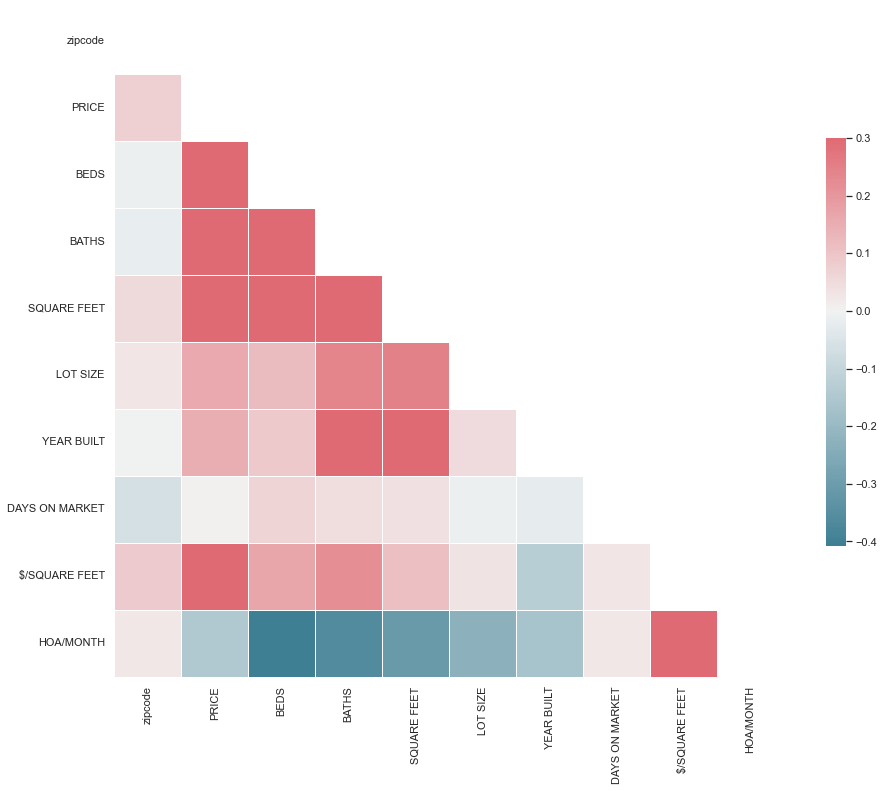

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

listings_correlation_matrix = listings_df.corr()

sns.set(style="white")
mask = np.zeros_like(listings_correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(listings_correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## 1. Linear Regression - Naive Model to predict list price based on all available parameters

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a copy of the data
lr_df = listings_df.copy()

# Preprocessing

# Remove missing values
lr_df.dropna(inplace=True)

# Convert categorical variables to numerical values
lr_df = pd.get_dummies(lr_df)

print(lr_df.shape)
lr_df.head()

# Split data into training and testing sets
X_train = lr_df.drop('PRICE', axis=1)[:80]
X_test = lr_df.drop('PRICE', axis=1)[80:]
y_train = lr_df['PRICE'][:80]
y_test = lr_df['PRICE'][80:]

# Create linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

(113, 136)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
import math
# Get Model Metrics

# Calculate RMSE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print("RMSE: ", rmse)

# Calculate R squared
print("R^2 score: ", model.score(X_test, y_test))

RMSE:  1240002.6662823753
R^2 score:  -6.742976906309445


## 2. Linear Regression - Updated Model

In [ ]:
# Create a copy of the data
lr_df2 = listings_df.copy()

# Include only key parameters based on general perception and
# Exclude categorical columns for classification along with  columns with mostly missing data
lr_df2 = lr_df2.drop(['city','state','zipcode','LOCATION', 'LOT SIZE', 'HOA/MONTH'], axis=1)


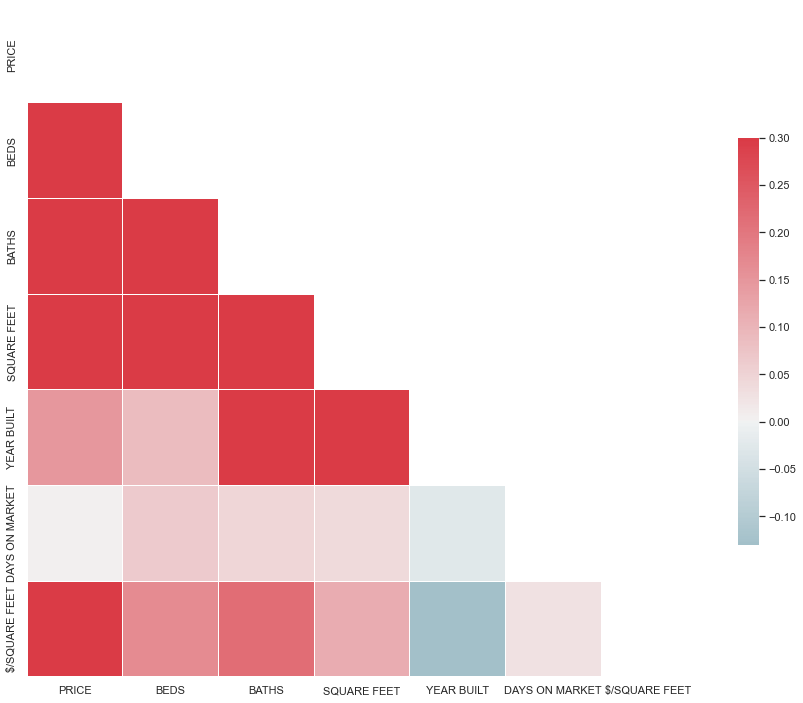

In [ ]:
# Plot correlation Matrix of updated model data
listings_correlation_matrix = lr_df2.corr()
sns.set(style="white")
mask = np.zeros_like(listings_correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(listings_correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
# Preprocess data

# Remove missing values
lr_df2.dropna(inplace=True)

# Convert categorical variables to numerical values
lr_df2 = pd.get_dummies(lr_df2)

print(lr_df2.shape)
lr_df2.head()

# Split data into training and testing sets
X_train2 = lr_df2.drop('PRICE', axis=1)[:80]
X_test2 = lr_df2.drop('PRICE', axis=1)[80:]
y_train2 = lr_df2['PRICE'][:80]
y_test2 = lr_df2['PRICE'][80:]

from sklearn.linear_model import LinearRegression
# Create linear regression model
model2 = LinearRegression()

# Train the model
model2.fit(X_train2, y_train2)

(340, 10)


LinearRegression()

In [ ]:
lr_df2.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,property_type_Condo/Co-op,property_type_Single Family Residential,property_type_Townhouse
count,3.400000e+02,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,7.001639e+05,3.600000,2.870588,2469.485294,1983.082353,3.782353,277.467647,0.147059,0.597059,0.255882
std,6.570340e+05,1.226069,1.243041,1615.281360,24.192669,10.324227,102.243111,0.354687,0.491212,0.436999
min,1.050000e+05,0.000000,1.000000,476.000000,1910.000000,1.000000,96.000000,0.000000,0.000000,0.000000
25%,3.637492e+05,3.000000,2.000000,1329.000000,1966.000000,1.000000,211.250000,0.000000,0.000000,0.000000
50%,5.250000e+05,4.000000,3.000000,2012.000000,1983.500000,1.000000,256.000000,0.000000,1.000000,0.000000
75%,7.380000e+05,4.000000,3.500000,3084.000000,2002.000000,2.000000,311.500000,0.000000,1.000000,1.000000
max,5.500000e+06,7.000000,9.500000,12089.000000,2024.000000,104.000000,765.000000,1.000000,1.000000,1.000000


In [ ]:
# Get model metrics

# Calculate RMSE
y_pred2 = model2.predict(X_test2)
mse2 = mean_squared_error(y_test2, y_pred2)
rmse2 = math.sqrt(mse2)

print("RMSE: ", rmse2)

# Calculate R squared
print("R^2 score: ", model2.score(X_test2, y_test2))

RMSE:  348075.6980953351
R^2 score:  0.7709235249116182
